<a href="https://colab.research.google.com/github/Aras1703/loan_customer_clustering/blob/main/Loan_customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin
from google.colab import drive
from sklearn.decomposition import PCA
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

data_path = '/content/drive/MyDrive/Data/Data struktural/loan_data_2007_2014.csv'
data = pd.read_csv(data_path)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
data.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [ ]:
data.dropna(axis=1, inplace=True)
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,860xx,AZ,27.65,13648,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,GA,1.00,1687,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,606xx,IL,8.72,2956,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,917xx,CA,20.00,5598,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,972xx,OR,17.94,27783,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL


In [ ]:
data.drop(columns=['Unnamed: 0', 'id', 'member_id', 'issue_d', 'url', 'zip_code', 'addr_state', 'policy_code', 'application_type'], 
          axis=1, inplace=True)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,Verified,Fully Paid,n,credit_card,27.65,13648,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,Source Verified,Charged Off,n,car,1.00,1687,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,Not Verified,Fully Paid,n,small_business,8.72,2956,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,Source Verified,Fully Paid,n,other,20.00,5598,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,Source Verified,Current,n,other,17.94,27783,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79


## Feature Selection

In [ ]:
categorical = data.select_dtypes(include='object')

le = LabelEncoder()
for i in categorical.columns:
    data[i] = le.fit_transform(data[i])

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,0,10.65,162.87,1,6,5,2,5,0,1,27.65,13648,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,1,15.27,59.83,2,13,5,1,0,0,0,1.00,1687,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,0,15.96,84.33,2,14,5,0,5,0,11,8.72,2956,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,0,13.49,339.31,2,10,5,1,5,0,9,20.00,5598,0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,1,12.69,67.79,1,9,5,1,1,0,9,17.94,27783,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79


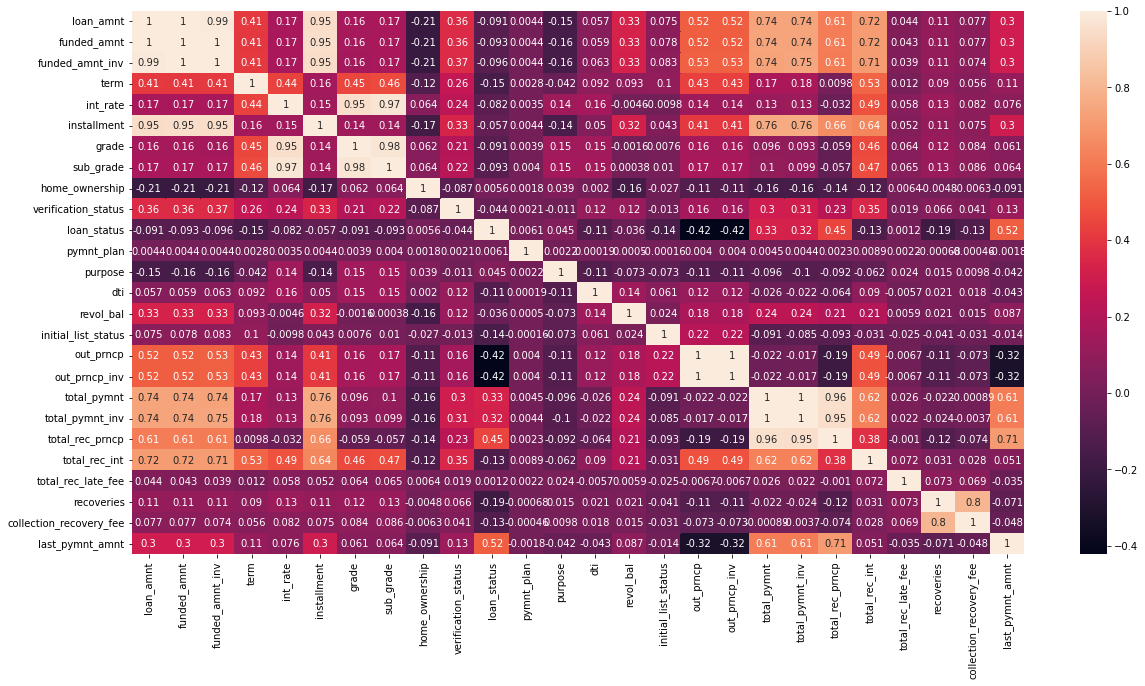

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
#feature selection : loan_amnt, funded_amnt, funded_amnt_inv, installment, int_rate
#feature selection : grade, sub_grade, total_pymnt, total_pymnt_inv, total_rec_prncp

fs_data = data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate',
                'grade', 'sub_grade', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']]
fs_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,grade,sub_grade,total_pymnt,total_pymnt_inv,total_rec_prncp
0,5000,5000,4975.0,162.87,10.65,1,6,5861.071414,5831.78,5000.00
1,2500,2500,2500.0,59.83,15.27,2,13,1008.710000,1008.71,456.46
2,2400,2400,2400.0,84.33,15.96,2,14,3003.653644,3003.65,2400.00
3,10000,10000,10000.0,339.31,13.49,2,10,12226.302210,12226.30,10000.00
4,3000,3000,3000.0,67.79,12.69,1,9,3242.170000,3242.17,2233.10


## Preprocessing

In [ ]:
std = StandardScaler()
data_cluster = fs_data.copy()
data_cluster[data_cluster.columns] = std.fit_transform(data_cluster)
data_cluster

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,grade,sub_grade,total_pymnt,total_pymnt_inv,total_rec_prncp
0,-1.124392,-1.122963,-1.114455,-1.105575,-0.729587,-0.618831,-0.775660,-0.687137,-0.683064,-0.549800
1,-1.426088,-1.425101,-1.412732,-1.528763,0.330634,0.138524,0.296334,-1.274191,-1.267385,-1.195952
2,-1.438156,-1.437186,-1.424784,-1.428140,0.488979,0.138524,0.449476,-1.032837,-1.025695,-0.919555
3,-0.521001,-0.518687,-0.508860,-0.380931,-0.077850,0.138524,-0.163092,0.082948,0.091640,0.161268
4,-1.365749,-1.364673,-1.352474,-1.496071,-0.261438,-0.618831,-0.316234,-1.003980,-0.996798,-0.943290
...,...,...,...,...,...,...,...,...,...,...
466280,0.492696,0.496497,0.503478,0.002377,0.147046,0.138524,-0.009950,-0.140017,-0.131635,-0.432331
466281,0.927137,0.931576,0.937336,0.617856,1.409214,0.895880,1.215186,-0.830279,-0.822856,-0.999615
466282,0.770256,0.774464,0.780665,0.337921,0.725348,0.895880,0.602618,0.097185,0.105897,-0.368948
466283,-1.486427,-1.485528,-1.472991,-1.517427,-1.360671,-1.376187,-1.235086,-1.138948,-1.131954,-0.976440


In [ ]:
pca_2 = PCA(10)
pca_2_result = pca_2.fit_transform(data_cluster)

## Modelling

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


0    318234
1    148051
dtype: int64

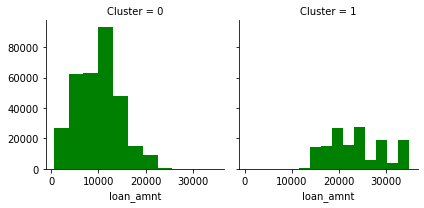

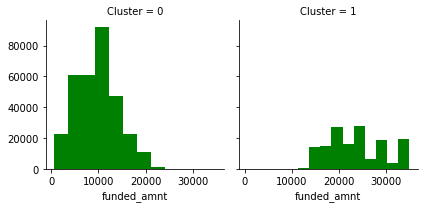

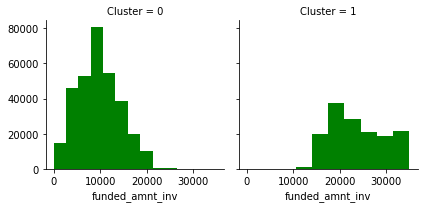

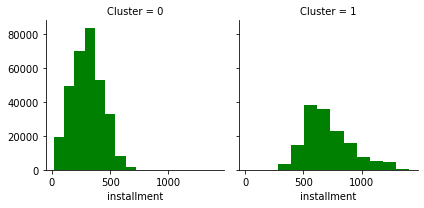

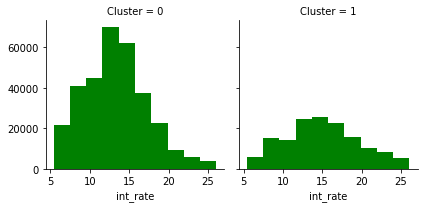

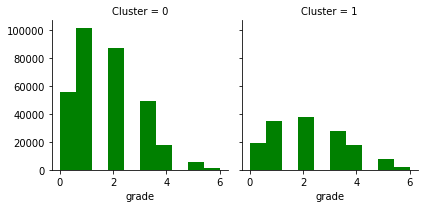

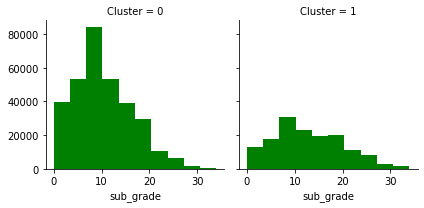

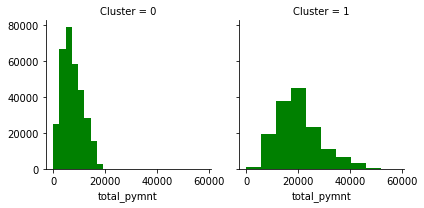

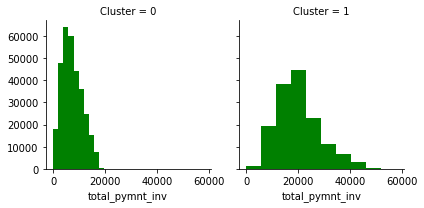

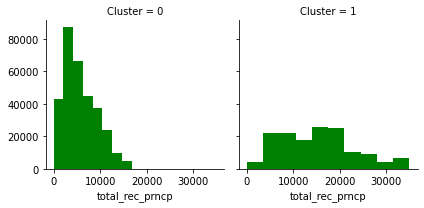

In [ ]:
df = fs_data.copy()
df['Cluster'] = kmeans_labels

aux = df.columns.tolist()
features = aux[0:len(aux)-1]

for cluster in features:
    grid= sns.FacetGrid(df, col='Cluster')
    grid.map(plt.hist, cluster,color='green')

In [ ]:
Clus = {0:'Low Risk', 1:'High Risk'}
df['Cluster'] = df['Cluster'].map(Clus)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,grade,sub_grade,total_pymnt,total_pymnt_inv,total_rec_prncp,Cluster
0,5000,5000,4975.0,162.87,10.65,1,6,5861.071414,5831.78,5000.00,Low Risk
1,2500,2500,2500.0,59.83,15.27,2,13,1008.710000,1008.71,456.46,Low Risk
2,2400,2400,2400.0,84.33,15.96,2,14,3003.653644,3003.65,2400.00,Low Risk
3,10000,10000,10000.0,339.31,13.49,2,10,12226.302210,12226.30,10000.00,Low Risk
4,3000,3000,3000.0,67.79,12.69,1,9,3242.170000,3242.17,2233.10,Low Risk


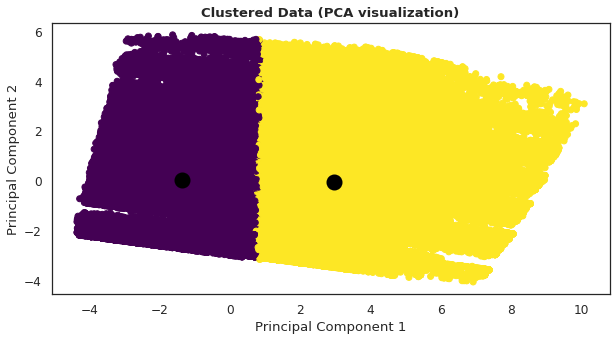

In [ ]:
sns.set(style='white', rc={'figure.figsize':(10,5)}, font_scale=1.1)

plt.scatter(x = pca_2_result[:, 0], y = pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(x = centroids_pca[:, 0], y = centroids_pca[:, 1], marker='o', s=169, linewidths=3, color='black', zorder=10, lw=3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)', fontweight='bold')
plt.show()

#.PY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin
from google.colab import drive
from sklearn.decomposition import PCA

def Preprocess(df, pca):
  data = df
  data.dropna(axis = 1, inplace = True) #Drop nan value 

  categorical = data.select_dtypes(include='object') #Encode categorical features
  le = LabelEncoder()
  for i in categorical.columns:
      data[i] = le.fit_transform(data[i])

  std = StandardScaler() #Normalization
  data[data.columns] = std.fit_transform(data)

  return data

def Models(n_clus, data):
  kmeans = KMeans(n_clusters=n_clus) #Cluster using K-means
  kmeans_labels = kmeans.fit_predict(data)

  return kmeans_labels

def result_map(data):
  Clus = {0:'Low Risk', 1:'High Risk'} #Mapping cluster result
  data['Cluster'] = data['Cluster'].map(Clus)

  return data